# Comparing Kepler data with ground-based photometry using light curve

We can use data from different surveys to compare light curves. This tutorial shows how to use lightkurve on Kepler and ASASSN data. 

We first start with searching the KEPLER data by downloading a target pixel file. We are using a famous star V827 Tau.

In [1]:
%matplotlib inline
from lightkurve import search_targetpixelfile

tpf = search_targetpixelfile('v827 tau').download();

Now let's display this star.

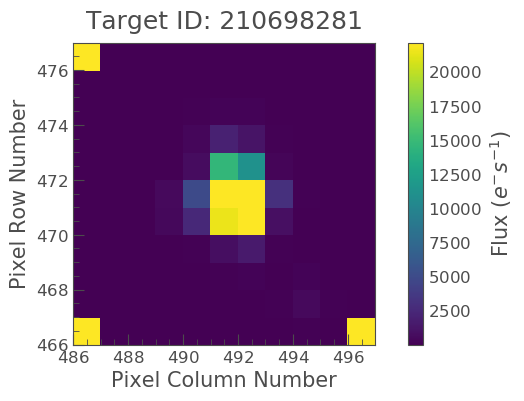

In [2]:
tpf.plot()

Here is the KEPLER light curve with a default threshold mask which is 3$\sigma$ above the background flux.

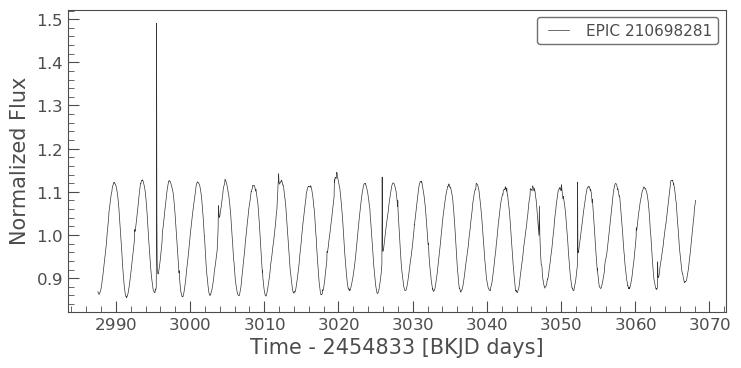

In [3]:
kepler_lc = tpf.to_lightcurve(aperture_mask='threshold')
kepler_lc.plot()

Then we did a periodogram of the light curve and determined its period.

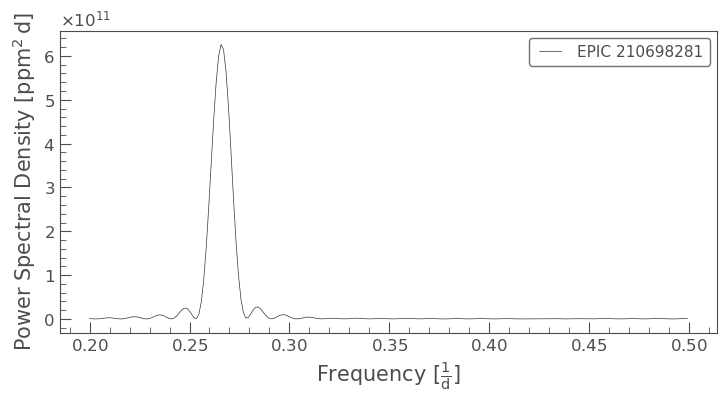

In [4]:
kepler_pg = kepler_lc.to_periodogram(min_period=2,max_period=5,oversample_factor=10)
kepler_pg.plot()

In [5]:
period = kepler_pg.period_at_max_power
print(period)

3.7624032233856117 d


If you want to interactively observe the lightcurve refer to this demo using the command below.

In [6]:
#tpf.interact()

![Interactive demo](http://docs.lightkurve.org/_images/20180924_interact_HLTau.gif)

Then we downloaded the photometric data for V827 Tau from ASSASN website https://asas-sn.osu.edu/database/light_curves/177605. We read the data in a pandas dataframe and plot the light curve.

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('lc110340.dat',delim_whitespace=True,skiprows=[1,2])
df = df.rename(columns={'#HJD':'HJD','(mJy)':'flux_err','flux_err':'nan'})


Now we want to put the data from ASSASN into a lightkurve object.

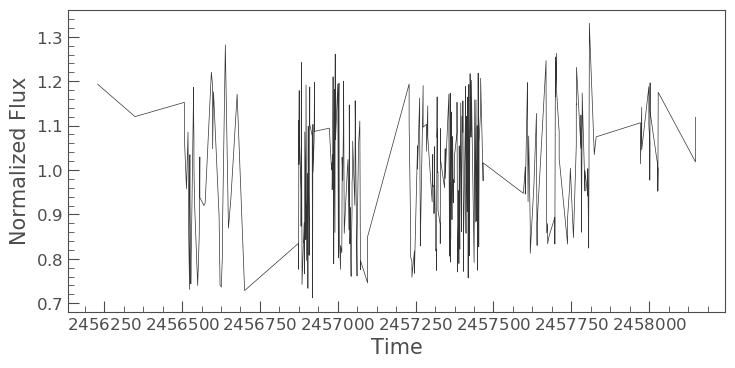

In [9]:
from lightkurve import LightCurve
assasn_lc = LightCurve(time=df['HJD'].values,flux=df['flux'].values,flux_err=df['flux_err'].values)
assasn_lc.plot()

Finally, we overplot the light curves from KEPLER and ASSASN. 

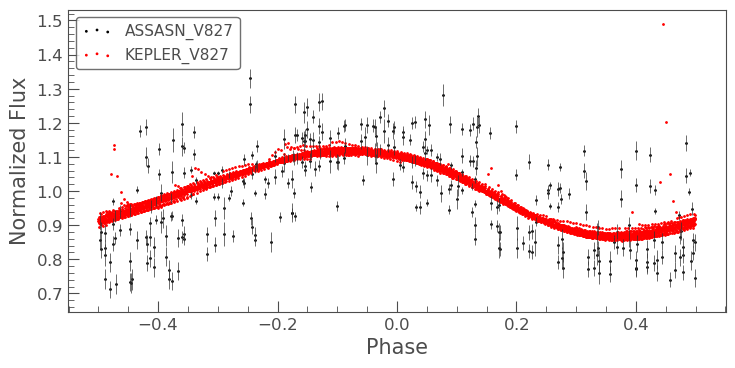

In [10]:
ax = assasn_lc.fold(period.value).errorbar()
assasn_lc.fold(period.value).scatter(ax=ax,color='black',label='ASSASN_V827')
kepler_lc.fold(period.value,transit_midpoint=2.7).scatter(ax=ax,color='red',label='KEPLER_V827')
